# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.75070          0.00892              0.00004   
1            1.00000           0.75070          0.91039              0.00004   
2            1.00000           0.67274          0.05100              0.16267   
3            1.00000           0.75070          0.11783              0.00003   
4            1.00000           0.19744          0.16311              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.76408                0.00872                   0.03473   
1            0.76551                0.00872                   0.03473   
2            0.76446                0.02193                   0.03683   
3            0.99241                0.00043                   0.00079   
4            0.76475                0.00000                   0.00059   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.01568            0.00186                0.00018  ...   
1               0.01568            0.00186                0.00018  ...   
2               0.01387            0.00664                0.00700  ...   
3               0.00060            0.00050                0.00001  ...   
4               0.00030            0.00664                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol             service  \
0        4648                      28       tcp  gssapi,smb,dce_rpc   
1        4648                      28       tcp  gssapi,smb,dce_rpc   
2       62994                      50       tcp                 ssl   
3         150                       2       udp                 dns   
4           0                       0       tcp                none   

   conn_state       orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0          SF  orig_reg_or_dyn  resp_well_known              No            No   
1          SF  orig_reg_or_dyn  resp_well_known              No            No   
2          SF  orig_reg_or_dyn         resp_443              No            No   
3          SF  orig_reg_or_dyn          resp_53              No            No   
4          SH  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0  2017-07-06T13:35:16.061794Z  
1  2017-07-06T14:02:17.855831Z  
2  2017-07-06T13:36:31.772798Z  
3  2017-07-06T13:38:32.003958Z  
4  2017-07-06T13:39:53.447605Z  

[5 rows x 283 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.75070          0.63309              0.00003   
1            1.00000           0.75070          0.15015              0.00003   
2            1.00000           0.75070          0.55791              0.00012   
3            1.00000           0.69694          0.47663              0.00018   
4            1.00000           0.08598          0.11988              0.09679   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.92297                0.00048                   0.00065   
1            0.93987                0.00040                   0.00057   
2            0.22687                0.00036                   0.00072   
3            0.82722                0.00306                   0.00431   
4            0.04265                0.00957                   0.01510   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00030            0.00050                0.00002  ...   
1               0.00030            0.00050                0.00002  ...   
2               0.00060            0.00050                0.00002  ...   
3               0.00151            0.00093                0.00010  ...   
4               0.00663            0.00664                0.00046  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         161                       1       udp      dns          SF   
1         213                       1       udp      dns          SF   
2         228                       2       udp      dns          SF   
3        1071                       5       tcp     http          SF   
4        4958                      22       tcp      ssl        RSTR   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn     resp_80              No            No   
4  orig_reg_or_dyn    resp_443              No            No   

                     timestamp  
0  2017-07-06T13:53:58.979659Z  
1  2017-07-06T13:39:30.137197Z  
2  2017-07-06T13:51:43.715926Z  
3  2017-07-06T13:49:17.502704Z  
4  2017-07-06T13:38:35.687056Z  

[5 rows x 283 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 17908 rows and 283 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        17908.00000       17908.00000      17908.00000   
mean             0.99810           0.64673          0.43430   
std              0.04353           0.20784          0.26208   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.67274          0.21571   
50%              1.00000           0.75070          0.46742   
75%              1.00000           0.75070          0.63757   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          17908.00000        17908.00000            17908.00000   
mean               0.01376            0.78071                0.00372   
std                0.03954            0.24478                0.01515   
min                0.00000            0.00000                0.00000   
25%                0.00000            0.76934                0.00041   
50%                0.00003            0.85335                0.00056   
75%                0.00111            0.93358                0.00257   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               17908.00000           17908.00000        17908.00000   
mean                    0.00603               0.00254            0.00312   
std                     0.02303               0.01472            0.03112   
min                     0.00000               0.00000            0.00000   
25%                     0.00076               0.00060            0.00050   
50%                     0.00093               0.00060            0.00050   
75%                     0.00486               0.00241            0.00093   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            17908.00000               17908.00000           17908.00000   
mean                 0.00095                   0.00099               0.00250   
std                  0.01453                   0.01459               0.01809   
min                  0.00000                   0.00000               0.00000   
25%                  0.00001                   0.00002               0.00055   
50%                  0.00002                   0.00003               0.00055   
75%                  0.00009                   0.00013               0.00164   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 17908.00000 17908.00000 17908.00000 17908.00000  17908.00000   
mean      0.66233     0.00352     0.07617     0.18679      0.01518   
std       0.47293     0.05921     0.26527     0.38975      0.04137   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      17908.00000                     17908.00000   
mean           0.45726                         0.44333   
std            0.27119                         0.25739   
min            0.00000                         0.00000   
25%            0.21124                         0.21431   
50%            0.46337                         0.42813   
75%            0.64764                         0.63025   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         17908.00000   
mean                              0.20956   
std                               0.13779   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.63309              0.00003            0.92297   
1          0.15015              0.00003            0.93987   
2          0.55791              0.00012            0.22687   
3          0.47663              0.00018            0.82722   
4          0.11988              0.09679            0.04265   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00048               0.00030            0.00050   
1                0.00040               0.00030            0.00050   
2                0.00036               0.00060            0.00050   
3                0.00306               0.00151            0.00093   
4                0.00957               0.00663            0.00664   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00002               0.00027    1.00000    0.00000   
1                0.00002               0.00027    1.00000    0.00000   
2                0.00002               0.00055    1.00000    0.00000   
3                0.00010               0.00137    0.00000    0.00000   
4                0.00046               0.00601    0.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     1.00000    0.00000      0.05556                           1   
4     0.00000    1.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   1   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    0                   0   
4                   0                    1                   0   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   1                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_tcp  connection.proto_udp  \
0                           0                     0                     1   
1                           0                     0                     1   
2                           0                     0                     1   
3                           0                     1                     0   
4                           0                     1                     0   

   connection.service_dce_rpc  connection.service_dns  connection.service_ftp  \
0                           0                       1                       0   
1                           0                       1                       0   
2                           0                       1                       0   
3                           0                       0                       0   
4                           0                       0                       0   

   connection.service_ftp-data  connection.service_gssapi,ntlm,smb  \
0                            0                                   0   
1                            0  

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH'],
      dtype='object', length=194)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 194 principal components: 0.9999999999999998


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.93150618]
Variance Captured by First   7 Principal Components: [0.90662513]
Variance Captured by First   5 Principal Components: [0.88301246]
Variance Captured by First   2 Principal Components: [0.8105143]
Variance Captured by the First Principal Component:  [0.7043766]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.42796692
Variance of connection.duration                       : 0.27640968
Variance of connection.orig_p                         : 0.05992997
Variance of connection.orig_bytes                     : 0.04620773
Variance of connection.orig_pkts                      : 0.03366997
Variance of connection.resp_p                         : 0.02077387
Variance of connection.resp_bytes                     : 0.01805432
Variance of connection.resp_pkts                      : 0.01346818
Variance of dns_count                                 : 0.01014449
Variance of ssh_count                                 : 0.00907319
Variance of http_count                                : 0.00873167
Variance of ssl_count                                 : 0.00707619
Variance of files_count                               : 0.00601549
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00537086
Variance of orig_p_cat_orig_well_known                : 0.0041

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0            0.00302              0.00852           -0.00981   
1           -0.00233             -0.00649            0.03642   
2           -0.12026             -0.00189            0.05066   
3            0.24706             -0.00396           -0.18218   
4           -0.29934             -0.00009           -0.13514   
..               ...                  ...                ...   
189         -0.00000             -0.00000           -0.00000   
190         -0.00000              0.00000           -0.00000   
191          0.00000             -0.00000           -0.00000   
192         -0.00000              0.00000           -0.00000   
193          0.00000             -0.00000           -0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00186               0.00114            0.00081   
1                 -0.00154              -0.00099           -0.00116   
2                 -0.00076               0.00003           -0.00123   
3                 -0.00156              -0.00060            0.00124   
4                  0.00006               0.00044            0.00114   
..                     ...                   ...                ...   
189               -0.00000               0.00000           -0.00000   
190               -0.00000              -0.00000            0.00000   
191               -0.00000               0.00000           -0.00000   
192               -0.00000              -0.00000            0.00000   
193                0.00000              -0.00000           -0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                  0.00058               0.00120   -0.19243    0.00075   
1                 -0.00044              -0.00101    0.14136   -0.00169   
2                  0.00029               0.00020   -0.03788    0.00180   
3                 -0.00047              -0.00079   -0.06713    0.00690   
4                  0.00037               0.00052   -0.06765    0.00428   
..                     ...                   ...        ...        ...   
189               -0.00000               0.00000   -0.00000    0.03498   
190                0.00000               0.00000   -0.00000    0.00686   
191                0.00000              -0.00000    0.00000    0.01407   
192               -0.00000               0.00000   -0.00000   -0.00000   
193                0.00000               0.00000   -0.00000   -0.26264   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0       0.04279    0.12341      0.00944                    -0.00662   
1      -0.03036   -0.09366     -0.00712                    -0.00276   
2       0.25599   -0.29146      0.00448                    -0.00053   
3       0.07231   -0.14552     -0.00305                    -0.10019   
4      -0.05699    0.00440     -0.00749                    -0.09954   
..          ...        ...          ...                         ...   
189    -0.00000   -0.00089      0.00000                     0.06188   
190    -0.00000    0.00094     -0.00000                     0.01099   
191    -0.00000    0.00707      0.00000                     0.17240   
192     0.00000   -0.00000     -0.00000                    -0.00000   
193     0.00000    0.11454     -0.00000                     0.12270   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.00662              0.00664             0.00018   
1                       0.00276              0.00235            -0.00033   
2                       0.00053              0.00133             0.00027   
3                       0.10019              0.08619             0.00198   
4                       0.09954              0.08778             0.00076   
..                          ...                  ...                 ...   
189                     0.06188             -0.02782            -0.07923   
190                     0.01099  

In [17]:
# pca_X = pca_X.sample(10000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
0      0.62404  3.09270 -0.09638 -0.03872 -0.46766 -0.09430  0.05109  0.00683   
1      0.63415  3.12081  0.16391 -0.55653  0.26214 -0.12146  0.03433  0.00541   
2     -2.00808 -0.60783 -0.24124  0.51772 -0.08337 -0.03481  0.04490 -0.10912   
3      2.34970 -1.14183  2.02700  0.44542 -0.48331  0.06196 -0.38375  0.21800   
4      2.83125 -1.45326 -0.90813 -0.36194  0.87899 -0.05919  0.01837 -0.60088   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  2.59835 -1.35621 -0.39336 -0.30192  0.99972 -0.78039  0.13854  0.21113   
17904 -1.16726 -1.42616  0.22383 -0.01970  0.04676  0.40871 -0.32110  0.35786   
17905  2.35312 -1.02693  2.52103 -0.43925  0.13544  0.10479 -0.18767 -0.25248   
17906 -1.99084 -0.58235  0.03946 -0.38048 -0.78083  0.05596  0.35001  0.35522   
17907 -2.16305 -0.73514 -0.05318  0.21363  0.79935  0.01112 -0.30147 -0.30350   

           8        9        10       11       12       13       14       15   \
0     -0.12160  0.04100  0.17233  0.03474 -0.13797  0.08660 -0.10540  0.08898   
1      0.01904 -0.01733 -0.17305  0.03216  0.13541  0.01017  0.02962 -0.05913   
2      0.11548 -0.18440 -0.08216 -0.10914 -0.19599  0.11652 -0.05438 -0.00117   
3     -0.40817 -0.18286 -0.04517 -0.08536  0.22791  0.05610 -0.26319  0.08026   
4      0.14371  0.87134 -0.69186 -1.13101  0.23313  0.24488 -0.16593 -0.31485   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  0.06264 -0.02274  0.00312  0.34797 -0.12671 -0.24333 -0.59332 -0.26117   
17904  0.30173  0.45098 -0.02818  0.25995 -0.23627  0.53377 -0.22549  0.70790   
17905  0.06322 -0.31889  0.25376 -0.36107 -0.04344  0.07458  0.01849  0.04847   
17906  0.26678 -0.05684  0.12583  0.01087 -0.05922  0.12617 -0.15432 -0.08635   
17907 -0.34965 -0.04844 -0.54825  0.10122  0.05934  0.07814 -0.17787  0.13205   

           16       17       18       19       20       21       22       23   \
0      0.13971 -0.04328 -0.03943  0.01990  0.03185  0.02935  0.02537 -0.07344   
1     -0.02032  0.02027  0.05412 -0.09293 -0.03716 -0.26148 -0.21214  0.36055   
2      0.03250 -0.36931  0.66306  0.08400 -0.10854 -0.06867 -0.06473 -0.03270   
3     -0.07995  0.23422 -0.13571 -0.03948  0.18930  0.07418  0.09335 -0.04158   
4      0.35452 -0.12833  0.35288 -0.10990  0.83139 -0.22661  0.22159  0.01223   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.12170  0.16601 -0.14477  0.43992 -0.38062 -0.05612  0.10375 -0.18459   
17904  0.58346  0.96522 -0.33643 -0.68594 -0.25522 -0.30407  0.02162 -0.23439   
17905 -0.06037  0.05961 -0.09955  0.02900  0.02368 -0.08202 -0.06236 -0.01990   
17906 -0.28051 -0.01875  0.21161 -0.01224 -0.00025 -0.09056  0.09687 -0.06446   
17907 -0.13915  0.01560 -0.00329  0.01565  0.20616 -0.12427  0.02446 -0.03456   

           24       25       26       27       28       29       30       31   \
0      0.03517  0.00552 -0.01620  0.00985  0.08514  0.06262 -0.17153  0.03242   
1     -0.15984  0.22229 -0.10912  0.11828  0.03722  0.03757 -0.21643 -0.02713   
2     -0.10532  0.07288 -0.04750 -0.02813 -0.20262 -0.05658  0.10325 -0.04268   
3      0.01403  0.14315 -0.27013  0.01244  0.04842  0.08608 -0.06440  0.12078   
4     -0.29120 -0.22521 -0.03668 -0.02901 -0.04677 -0.04573  0.08585  0.11743   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.17875 -0.07404 -0.06331  0.38758 -0.14711  0.60109  0.03524  0.12168   
17904 -0.16356  0.18389 -0.35647 -0.33972 -0.27838  0.18004 -0.04368 -0.07883   
17905  0.02945 -0.06469  0.06905  0.02692 -0.06075  0.05486  0.02838 -0.02913   
17906  0.00271  0.05531 -0.06649 -0.03534 -0.11082  0.00199  0.08310 -0.09725   
17907  0.12107 -0.03716 -0.12892  0.03655 -0.16023 -0.09351  0.07449  0.00307   

           32       33       34       35       36       37       38       39   \
0     -0.21287 -0.08627  0.06840  0.00

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:24:56.
DBSCAN finished (00:25:10)
Done at 00:25:10.


In [20]:
print_str

'DBSCAN finished (00:25:10)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    0,     1,     2, ..., 17905, 17906, 17907])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[ 6.24044580e-01,  3.09269745e+00, -9.63784600e-02, ...,
        -4.18283017e-05, -2.17439976e-04, -9.34213772e-05],
       [ 6.34150733e-01,  3.12080553e+00,  1.63908680e-01, ...,
         3.88047583e-05, -3.56227286e-06,  2.70573104e-04],
       [-2.00808287e+00, -6.07828262e-01, -2.41237508e-01, ...,
         3.45359346e-04, -1.19429429e-04, -8.31511123e-05],
       ...,
       [ 2.35312255e+00, -1.02693059e+00,  2.52103299e+00, ...,
         2.07909379e-05,  1.51558288e-05, -3.61409223e-05],
       [-1.99084203e+00, -5.82350643e-01,  3.94552990e-02, ...,
         2.75938649e-04,  1.21927681e-05, -1.96582476e-05],
       [-2.16304935e+00, -7.35142097e-01, -5.31821271e-02, ...,
        -2.16506513e-04, -1.85640765e-04, -4.50746356e-05]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([0, 0, 1, ..., 2, 1, 1])

In [25]:
y_db

array([0, 0, 1, ..., 2, 1, 1])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0  0.62404  3.09270 -0.09638 -0.03872 -0.46766 -0.09430  0.05109  0.00683   
1  0.63415  3.12081  0.16391 -0.55653  0.26214 -0.12146  0.03433  0.00541   
2 -2.00808 -0.60783 -0.24124  0.51772 -0.08337 -0.03481  0.04490 -0.10912   
3  2.34970 -1.14183  2.02700  0.44542 -0.48331  0.06196 -0.38375  0.21800   
4  2.83125 -1.45326 -0.90813 -0.36194  0.87899 -0.05919  0.01837 -0.60088   

         8        9       10       11       12      13       14       15  \
0 -0.12160  0.04100  0.17233  0.03474 -0.13797 0.08660 -0.10540  0.08898   
1  0.01904 -0.01733 -0.17305  0.03216  0.13541 0.01017  0.02962 -0.05913   
2  0.11548 -0.18440 -0.08216 -0.10914 -0.19599 0.11652 -0.05438 -0.00117   
3 -0.40817 -0.18286 -0.04517 -0.08536  0.22791 0.05610 -0.26319  0.08026   
4  0.14371  0.87134 -0.69186 -1.13101  0.23313 0.24488 -0.16593 -0.31485   

        16       17       18       19       20       21       22       23  \
0  0.13971 -0.04328 -0.03943  0.01990  0.03185  0.02935  0.02537 -0.07344   
1 -0.02032  0.02027  0.05412 -0.09293 -0.03716 -0.26148 -0.21214  0.36055   
2  0.03250 -0.36931  0.66306  0.08400 -0.10854 -0.06867 -0.06473 -0.03270   
3 -0.07995  0.23422 -0.13571 -0.03948  0.18930  0.07418  0.09335 -0.04158   
4  0.35452 -0.12833  0.35288 -0.10990  0.83139 -0.22661  0.22159  0.01223   

        24       25       26       27       28       29       30       31  \
0  0.03517  0.00552 -0.01620  0.00985  0.08514  0.06262 -0.17153  0.03242   
1 -0.15984  0.22229 -0.10912  0.11828  0.03722  0.03757 -0.21643 -0.02713   
2 -0.10532  0.07288 -0.04750 -0.02813 -0.20262 -0.05658  0.10325 -0.04268   
3  0.01403  0.14315 -0.27013  0.01244  0.04842  0.08608 -0.06440  0.12078   
4 -0.29120 -0.22521 -0.03668 -0.02901 -0.04677 -0.04573  0.08585  0.11743   

        32       33       34       35       36       37       38       39  \
0 -0.21287 -0.08627  0.06840  0.00894  0.00294  0.00645 -0.00686  0.02529   
1 -0.13012 -0.05130  0.00604 -0.00197 -0.02180  0.01024  0.00679  0.00035   
2 -0.09442 -0.01253  0.03669 -0.01260  0.03473  0.01726  0.02381 -0.02296   
3  0.06584  0.10728 -0.01792  0.13430  0.04585  0.13316 -0.09609  0.06411   
4 -0.02064 -0.06466  0.00052  0.00250  0.08756 -0.04112 -0.11080  0.13291   

        40       41       42       43       44       45       46       47  \
0 -0.04446  0.00383  0.00785  0.02740 -0.01070  0.03743 -0.00121 -0.01720   
1 -0.01555  0.01566  0.02571  0.03795 -0.02185  0.05648  0.01700 -0.03369   
2  0.02484 -0.01947 -0.00428 -0.01692 -0.00102 -0.00841 -0.01639  0.01084   
3  0.07140 -0.10853 -0.01872 -0.02069 -0.00122 -0.02192  0.00054  0.04668   
4  0.07402  0.20582  0.09060 -0.02424 -0.05235  0.03669  0.05517  0.02992   

       48       49       50       51       52       53       54       55  \
0 0.02923 -0.01917  0.05725  0.01668 -0.02614 -0.00310  0.00556 -0.04419   
1 0.05430 -0.02488  0.08940  0.03461 -0.04683 -0.01998 -0.01998 -0.07527   
2 0.02155  0.00454 -0.02127 -0.00043  0.01512 -0.01507 -0.00034  0.01749   
3 0.00088  0.00767  0.03665 -0.05673 -0.01961 -0.02195  0.00513  0.01619   
4 0.01339 -0.00469  0.04069 -0.00880  0.02903 -0.00695 -0.02195 -0.01814   

        56       57       58       59       60       61       62       63  \
0  0.02324 -0.01237  0.01274  0.00992 -0.01034  0.00472  0.00776  0.00339   
1  0.02201 -0.01988  0.03637  0.00618 -0.02873 -0.01447  0.01219  0.00995   
2  0.02226 -0.03111 -0.01120  0.00873 -0.00990 -0.00499 -0.00791 -0.01795   
3 -0.01099  0.02699  0.00888 -0.03271 -0.04222  0.01082  0.02180 -0.01547   
4 -0.00611 -0.03372 -0.06449  0.00942  0.06725  0.00048 -0.03921 -0.05733   

        64       65       66       67       68       69       70       71  \
0  0.01758 -0.00620 -0.00986 -0.00284  0.00124 -0.00030 -0.00441  0.00634   
1 -0.00200 -0.00676 -0.01473  0.00600 -0.00173 -0.01762  0.00363 -0.00268   
2 -0.01050  0.01908 -0.00240 -0.02629  0.00641  0.00533  0.00362 -0.00056   
3  0.0049

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 1    7656
 0    3734
 3    3255
 2    1775
-1    1118
 4     370
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([ 0,  1,  2,  3,  4, -1])

## 3. Results

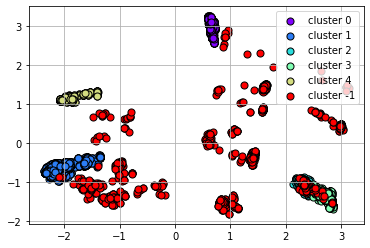

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

K_CLUSTERS = len(pca_X['cluster'].value_counts())

colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

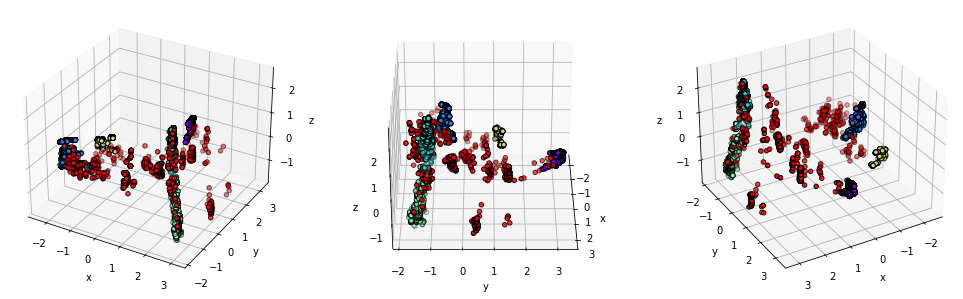

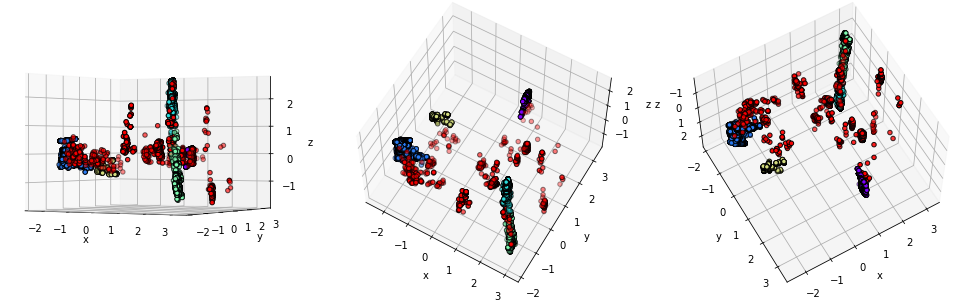

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0      0.62404  3.09270 -0.09638 -0.03872 -0.46766 -0.09430  0.05109  0.00683   
1      0.63415  3.12081  0.16391 -0.55653  0.26214 -0.12146  0.03433  0.00541   
2     -2.00808 -0.60783 -0.24124  0.51772 -0.08337 -0.03481  0.04490 -0.10912   
3      2.34970 -1.14183  2.02700  0.44542 -0.48331  0.06196 -0.38375  0.21800   
4      2.83125 -1.45326 -0.90813 -0.36194  0.87899 -0.05919  0.01837 -0.60088   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  2.59835 -1.35621 -0.39336 -0.30192  0.99972 -0.78039  0.13854  0.21113   
17904 -1.16726 -1.42616  0.22383 -0.01970  0.04676  0.40871 -0.32110  0.35786   
17905  2.35312 -1.02693  2.52103 -0.43925  0.13544  0.10479 -0.18767 -0.25248   
17906 -1.99084 -0.58235  0.03946 -0.38048 -0.78083  0.05596  0.35001  0.35522   
17907 -2.16305 -0.73514 -0.05318  0.21363  0.79935  0.01112 -0.30147 -0.30350   

             8        9       10       11       12       13       14       15  \
0     -0.12160  0.04100  0.17233  0.03474 -0.13797  0.08660 -0.10540  0.08898   
1      0.01904 -0.01733 -0.17305  0.03216  0.13541  0.01017  0.02962 -0.05913   
2      0.11548 -0.18440 -0.08216 -0.10914 -0.19599  0.11652 -0.05438 -0.00117   
3     -0.40817 -0.18286 -0.04517 -0.08536  0.22791  0.05610 -0.26319  0.08026   
4      0.14371  0.87134 -0.69186 -1.13101  0.23313  0.24488 -0.16593 -0.31485   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  0.06264 -0.02274  0.00312  0.34797 -0.12671 -0.24333 -0.59332 -0.26117   
17904  0.30173  0.45098 -0.02818  0.25995 -0.23627  0.53377 -0.22549  0.70790   
17905  0.06322 -0.31889  0.25376 -0.36107 -0.04344  0.07458  0.01849  0.04847   
17906  0.26678 -0.05684  0.12583  0.01087 -0.05922  0.12617 -0.15432 -0.08635   
17907 -0.34965 -0.04844 -0.54825  0.10122  0.05934  0.07814 -0.17787  0.13205   

            16       17       18       19       20       21       22       23  \
0      0.13971 -0.04328 -0.03943  0.01990  0.03185  0.02935  0.02537 -0.07344   
1     -0.02032  0.02027  0.05412 -0.09293 -0.03716 -0.26148 -0.21214  0.36055   
2      0.03250 -0.36931  0.66306  0.08400 -0.10854 -0.06867 -0.06473 -0.03270   
3     -0.07995  0.23422 -0.13571 -0.03948  0.18930  0.07418  0.09335 -0.04158   
4      0.35452 -0.12833  0.35288 -0.10990  0.83139 -0.22661  0.22159  0.01223   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.12170  0.16601 -0.14477  0.43992 -0.38062 -0.05612  0.10375 -0.18459   
17904  0.58346  0.96522 -0.33643 -0.68594 -0.25522 -0.30407  0.02162 -0.23439   
17905 -0.06037  0.05961 -0.09955  0.02900  0.02368 -0.08202 -0.06236 -0.01990   
17906 -0.28051 -0.01875  0.21161 -0.01224 -0.00025 -0.09056  0.09687 -0.06446   
17907 -0.13915  0.01560 -0.00329  0.01565  0.20616 -0.12427  0.02446 -0.03456   

            24       25       26       27       28       29       30       31  \
0      0.03517  0.00552 -0.01620  0.00985  0.08514  0.06262 -0.17153  0.03242   
1     -0.15984  0.22229 -0.10912  0.11828  0.03722  0.03757 -0.21643 -0.02713   
2     -0.10532  0.07288 -0.04750 -0.02813 -0.20262 -0.05658  0.10325 -0.04268   
3      0.01403  0.14315 -0.27013  0.01244  0.04842  0.08608 -0.06440  0.12078   
4     -0.29120 -0.22521 -0.03668 -0.02901 -0.04677 -0.04573  0.08585  0.11743   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.17875 -0.07404 -0.06331  0.38758 -0.14711  0.60109  0.03524  0.12168   
17904 -0.16356  0.18389 -0.35647 -0.33972 -0.27838  0.18004 -0.04368 -0.07883   
17905  0.02945 -0.06469  0.06905  0.02692 -0.06075  0.05486  0.02838 -0.02913   
17906  0.00271  0.05531 -0.06649 -0.03534 -0.11082  0.00199  0.08310 -0.09725   
17907  0.12107 -0.03716 -0.12892  0.03655 -0.16023 -0.09351  0.07449  0.00307   

            32       33       34       35       36       37       38       39  \
0     -0.21287 -0.08627  0.06840  0.0089

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0          -1     1118      udp     ntp         SF  orig_reg_or_dyn   
1           0     3734      udp     dns         SF  orig_reg_or_dyn   
2           1     7656      udp     dns         SF  orig_reg_or_dyn   
3           2     1775      tcp    http         SF  orig_reg_or_dyn   
4           3     3255      tcp     ssl         SF  orig_reg_or_dyn   
5           4      370      udp     dns         SF  orig_reg_or_dyn   

  resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0   resp_123          0.42786              0.01232                0.00583   
1    resp_53          0.42930              0.00016                0.00037   
2    resp_53          0.43139              0.00005                0.00064   
3    resp_80          0.38662              0.03696                0.00714   
4   resp_443          0.47374              0.05104                0.01258   
5    resp_53          0.44615              0.00001                0.00046   

   connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0               0.00356                0.00052               0.00277   
1               0.00031                0.00001               0.00028   
2               0.00070                0.00003               0.00057   
3               0.00590                0.00310               0.00629   
4               0.00748                0.00330               0.00762   
5               0.00062                0.00001               0.00056   

   dns_count  ssh_count  http_count  ssl_count  files_count  
0    0.09034    0.05635     0.03667    0.10644      0.00648  
1    1.00000    0.00000     0.00000    0.00000      0.00000  
2    1.00000    0.00000     0.00000    0.00000      0.00000  
3    0.00000    0.00000     0.74535    0.00000      0.05468  
4    0.00000    0.00000     0.00000    0.99109      0.05147  
5    1.00000    0.00000     0.00000    0.00000      0.00000

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

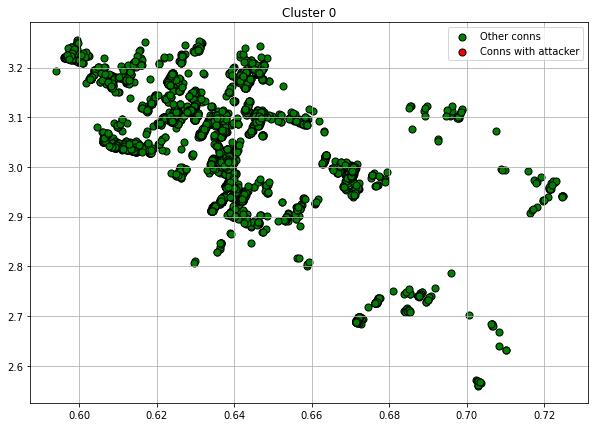

Total num of conns: 3734

Attacker conns ratio:
No    3734
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    3734
Name: originated_ip, dtype: int64

192.168.10.1    3734
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:04.537058Z
timestamp max = 2017-07-06T14:04:47.085873Z

Cluster 0 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
3246    CHEOo2y3T2Mj4MDAa            1.00000  192.168.10.3           0.75070   
14522   C7ObUuWci5hRteWZ4            1.00000  192.168.10.3           0.75070   
4054   CG9JIs3f2kvw7UpXc4            1.00000  192.168.10.3           0.75070   
15764   CEsYbshU0uPWnhFOd            1.00000  192.168.10.3           0.75070   
4672   Cm2bC34EPZDkp7k7Of            1.00000  192.168.10.3           0.75070   
6560    CekFQefzEWr3R0sGa            1.00000  192.168.10.3           0.75070   
10324   ChrnKt1wePm9aj2DU            1.00000  192.168.10.3           0.75070   
17438   CpDY4wMZjuUajqTLj            1.00000  192.168.10.3           0.75070   
1784    Cz6pmvem3kyR4yByg            1.00000  192.168.10.3           0.75070   
9348   CLAW9A2SYZt2eJXAWg            1.00000  192.168.10.3           0.75070   
2624     CRt7m4XMHU5RmuMh            1.00000  192.168.10.3           0.75070   
3931   CDfWs31pAOSZqBtzt3            1.00000  192.168.10.3           0.75070   
942     CPVcdbTNtoxpEuok7            1.00000  192.168.10.3           0.75070   
1021   CK9wOn2rhjzF3DYf73            1.00000  192.168.10.3           0.75070   
845    CUDd7t2zEWHEoCtcda            1.00000  192.168.10.3           0.75070   

       responded_ip                    timestamp  connection.time  duration  \
3246   192.168.10.1  2017-07-06T13:44:26.048932Z          0.31463   0.14777   
14522  192.168.10.1  2017-07-06T13:46:16.181967Z          0.37585   0.19648   
4054   192.168.10.1  2017-07-06T13:50:56.588057Z          0.53171   0.03050   
15764  192.168.10.1  2017-07-06T14:04:46.247186Z          0.99288   0.00041   
4672   192.168.10.1  2017-07-06T13:58:52.039567Z          0.79599   0.00040   
6560   192.168.10.1  2017-07-06T13:49:08.692069Z          0.47174   0.29822   
10324  192.168.10.1  2017-07-06T14:00:40.877996Z          0.85649   0.02371   
17438  192.168.10.1  2017-07-06T13:49:21.603607Z          0.47891   0.12790   
1784   192.168.10.1  2017-07-06T14:02:22.667207Z          0.91307   0.08559   
9348   192.168.10.1  2017-07-06T13:56:47.745683Z          0.72690   0.03224   
2624   192.168.10.1  2017-07-06T13:54:09.356017Z          0.63886   0.06096   
3931   192.168.10.1  2017-07-06T13:58:55.592961Z          0.79796   0.35687   
942    192.168.10.1    2017-07-06T13:53:56.1115Z          0.63150   0.05146   
1021   192.168.10.1  2017-07-06T13:51:43.488657Z          0.55778   0.36586   
845    192.168.10.1  2017-07-06T13:44:19.243877Z          0.31085   0.06373   

       connection.duration protocol service conn_state  connection.orig_p  \
3246               0.00012      udp     dns         SF            0.95322   
14522              0.00016      udp     dns         SF            0.94231   
4054               0.00003      udp     dns         SF            0.93358   
15764              0.00000      udp     dns         SF            0.93408   
4672               0.00000      udp     dns         SF            0.94755   
6560               0.00025      udp     dns         SF            0.95402   
10324              0.00002      udp     dns         SF            0.94581   
17438              0.00011      udp     dns         SF            0.94007   
1784               0.00007      udp     dns         SF            0.92900   
9348               0.00003      udp     dns         SF            0.94601   
2624               0.00005      udp     dns         SF            0.94957   
3931               0.00030      udp     dns         SF            0.93642   
942                0.00004      udp     dns         SF            0.91672   
1021               0.00031      udp     dns         SF            0.91891   
845                0.00005      udp     dns         SF            0.92304   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
3246    62470  orig_reg_or_dyn                0.00037       53   
14522   61756  orig_reg_or_dyn                0.00027       38   
4054    61184  orig_reg_or_dyn               

Protocol:
udp    3734
Name: protocol, dtype: int64

Service:
dns    3734
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3734
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    3734
Name: resp_p_cat, dtype: int64




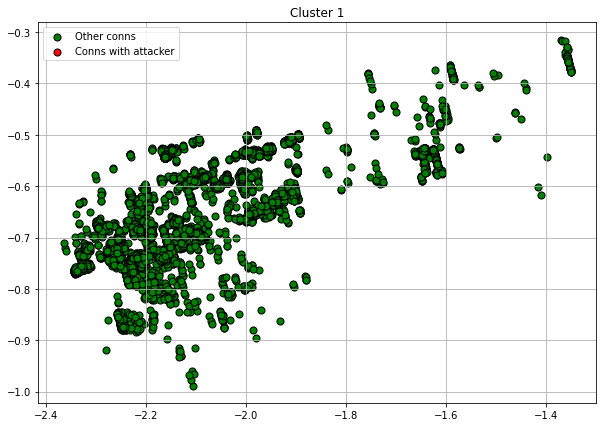

Total num of conns: 7656

Attacker conns ratio:
No    7656
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     2004
192.168.10.14    1654
192.168.10.15    1229
192.168.10.12     819
192.168.10.5      597
192.168.10.9      537
192.168.10.16     321
192.168.10.51     240
192.168.10.17     213
192.168.10.25      42
Name: originated_ip, dtype: int64

192.168.10.3    7656
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:04.536755Z
timestamp max = 2017-07-06T14:04:55.052295Z

Cluster 1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
6590   CXeKlH3qp9YhDlheN7            1.00000  192.168.10.15           0.75070   
699     C1Swz8Yn5dIUlcSdb            1.00000  192.168.10.14           0.75070   
8299   CsjQ1G4FLksTT96t2l            1.00000   192.168.10.8           0.75070   
11208  CsokkT138z70Z56zp8            1.00000   192.168.10.8           0.75070   
6537   CjFp2h3I8jR6KrPd03            1.00000   192.168.10.8           0.75070   
15537  CGwDbo3xibAkLBlwr7            1.00000   192.168.10.9           0.75070   
823    CSZmSX3Csu41wb7c6j            1.00000  192.168.10.15           0.75070   
5082   CTWxNL3rRdWdYovD3c            1.00000  192.168.10.14           0.75070   
14986  CPnaac28hlOjUzYiMg            1.00000   192.168.10.9           0.75070   
1464   Cp5jBg35YShOUE3AR6            1.00000  192.168.10.14           0.75070   
8826   C9pYwk2cAGP6vvIGr2            1.00000   192.168.10.9           0.75070   
8119     CmiHYqVBjNm7xsTl            1.00000   192.168.10.8           0.75070   
11963  CHQnlr246P7iNT2cCk            1.00000   192.168.10.5           0.75070   
2381   Cp3E0B3c2XBgROAMG1            1.00000   192.168.10.8           0.75070   
4889   CmrdrV2L9gu5eYsD13            1.00000   192.168.10.8           0.75070   

       responded_ip                    timestamp  connection.time  duration  \
6590   192.168.10.3  2017-07-06T13:45:27.518897Z          0.34880   0.00020   
699    192.168.10.3  2017-07-06T13:36:24.377957Z          0.04689   0.00021   
8299   192.168.10.3  2017-07-06T13:43:38.127114Z          0.28799   0.00016   
11208  192.168.10.3  2017-07-06T13:49:07.931163Z          0.47131   0.35556   
6537   192.168.10.3  2017-07-06T13:48:54.507638Z          0.46385   0.00015   
15537  192.168.10.3  2017-07-06T13:38:35.660012Z          0.11987   0.02180   
823    192.168.10.3  2017-07-06T13:45:28.239183Z          0.34920   0.00016   
5082   192.168.10.3  2017-07-06T13:40:33.949511Z          0.18562   0.03123   
14986  192.168.10.3  2017-07-06T13:58:46.285811Z          0.79279   0.00016   
1464   192.168.10.3  2017-07-06T13:53:54.884933Z          0.63082   0.00022   
8826   192.168.10.3  2017-07-06T13:58:49.899048Z          0.79480   0.02413   
8119   192.168.10.3  2017-07-06T13:51:40.107365Z          0.55590   0.00126   
11963  192.168.10.3  2017-07-06T13:49:45.041354Z          0.49194   0.07501   
2381   192.168.10.3  2017-07-06T13:51:41.768312Z          0.55682   0.00021   
4889   192.168.10.3  2017-07-06T13:43:37.402161Z          0.28759   0.00093   

       connection.duration protocol service conn_state  connection.orig_p  \
6590               0.00000      udp     dns         SF            0.77791   
699                0.00000      udp     dns         SF            0.79962   
8299               0.00000      udp     dns         SF            0.92078   
11208              0.00030      udp     dns         SF            0.99435   
6537               0.00000      udp     dns         SF            0.84616   
15537              0.00002      udp     dns         SF            0.78872   
823                0.00000      udp     dns         SF            0.81549   
5082               0.00003      udp     dns         SF            0.78858   
14986              0.00000      udp     dns         SF            0.95457   
1464               0.00000      udp     dns         SF            0.76977   
8826               0.00002      udp     dns         SF            0.82431   
8119               0.00000      udp     dns         SF            0.79239   
11963              0.00006      udp     dns         SF            0.81337   
2381               0.00000      udp     dns         SF            0.84974   
4889               0.00000      udp     dns         SF            0.91327   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
6590    50989  orig_reg_or_dyn                0.00050       72   
699     52411  orig_reg_or_dyn                0.00045       64   
8299    60346  orig_reg_or_dy

Protocol:
udp    7656
Name: protocol, dtype: int64

Service:
dns    7656
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    7656
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    7656
Name: resp_p_cat, dtype: int64




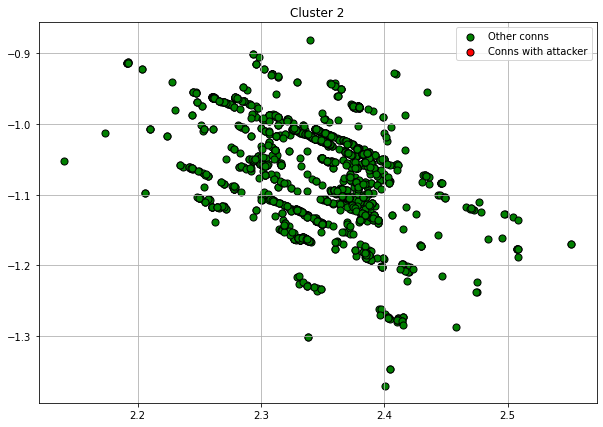

Total num of conns: 1775

Attacker conns ratio:
No    1775
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    649
192.168.10.8     352
192.168.10.12    195
192.168.10.15    179
192.168.10.5     119
192.168.10.9      97
192.168.10.16     90
192.168.10.51     68
192.168.10.17     25
192.168.10.25      1
Name: originated_ip, dtype: int64

23.50.75.27       255
178.255.83.1      150
72.21.91.29       125
72.167.239.239     97
23.60.139.27       44
                 ... 
34.225.175.93       1
23.206.168.52       1
34.202.10.171       1
202.232.238.39      1
38.29.168.136       1
Name: responded_ip, Length: 349, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:04.036959Z
timestamp max = 2017-07-06T14:04:47.261191Z

Cluster 2 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
10981  CTeMLH2mYMkABUeI5d            1.00000  192.168.10.16           0.75956   
15743   CtXGpDZutLMvjaQ93            1.00000  192.168.10.14           0.81280   
5664   CBJ47C2IXJBfzaxaAe            1.00000  192.168.10.14           0.08598   
9883    CK4kTwonCIQAVspp2            1.00000   192.168.10.8           0.79398   
16424   CeZGYj8CCObgNKjQ7            1.00000  192.168.10.14           0.63324   
11719  CYG9M11M7kr647zJ51            1.00000   192.168.10.8           0.20794   
7028    Cfh7dq2Rfp06S6Oed            1.00000  192.168.10.15           0.69694   
5516   CZtY0F29P38dxw4KZ7            1.00000  192.168.10.15           0.08376   
11421  C0agyY3FGyMGO4toqi            1.00000  192.168.10.15           0.69694   
2210   CRBeEf1P22OekmDXS1            1.00000  192.168.10.14           0.67274   
16528  CGvKWM2OIgkKidd1Za            1.00000  192.168.10.14           0.20863   
14065  CVED2n41IL1H3S6Ga2            1.00000  192.168.10.15           0.69694   
580    CT56wB39BwNJCafPk9            1.00000  192.168.10.51           0.67274   
15187  CMizTk1yprfooDD2ck            1.00000  192.168.10.12           0.69694   
16754  CqYMLv17ogm6YRjee9            1.00000  192.168.10.12           0.27616   

          responded_ip                    timestamp  connection.time  \
10981  194.232.104.141  2017-07-06T13:58:53.621267Z          0.79687   
15743  208.111.171.162   2017-07-06T13:53:53.92267Z          0.63028   
5664    23.194.141.179  2017-07-06T13:40:28.334483Z          0.18250   
9883    203.167.55.125  2017-07-06T13:48:54.193149Z          0.46368   
16424    162.208.22.39  2017-07-06T13:40:27.451994Z          0.18201   
11719    54.192.36.157  2017-07-06T13:49:00.646203Z          0.46726   
7028      178.255.83.1  2017-07-06T13:41:27.761796Z          0.21553   
5516       23.50.75.27  2017-07-06T13:41:30.533252Z          0.21707   
11421     178.255.83.1  2017-07-06T13:45:23.027816Z          0.34630   
2210      172.217.11.6  2017-07-06T13:40:34.520087Z          0.18594   
16528   54.236.179.153  2017-07-06T13:36:00.660065Z          0.03371   
14065     178.255.83.1  2017-07-06T13:49:15.049474Z          0.47527   
580      172.217.10.46   2017-07-06T13:48:18.69508Z          0.44395   
15187     178.255.83.1  2017-07-06T13:54:10.743556Z          0.63963   
16754      72.21.91.29  2017-07-06T13:56:32.983612Z          0.71870   

       duration  connection.duration protocol service conn_state  \
10981   0.48854              0.00041      tcp    http         SF   
15743   3.30442              0.00276      tcp    http         SF   
5664    0.43908              0.00037      tcp    http         SF   
9883    0.38142              0.00032      tcp    http         SF   
16424   5.98001              0.00500      tcp    none         SF   
11719 115.92351              0.09685      tcp    http         SF   
7028    3.18791              0.00266      tcp    http         SF   
5516   60.62082              0.05064      tcp    http         SF   
11421   0.44221              0.00037      tcp    http         SF   
2210  115.36875              0.09638      tcp    http         SF   
16528  76.24180              0.06369      tcp    http         SF   
14065   0.08114              0.00007      tcp    http         SF   
580   116.34693              0.09720      tcp    http         SF   
15187   3.11671              0.00260      tcp    none         SF   
16754 115.33914              0.09636      tcp    http         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
10981            0.79317   51988  orig_reg_or_dyn                0.00231   
15743            0.94196   61733  orig_reg_or_dyn                0.00217   
5664             0.93756   61445  orig_reg_or_dyn                0.01789   
9883             0.76814   50349  orig_reg_or_dyn                0.00189   
16424            0.93666   61386  orig_reg_or_dyn                0.00000   
11719            0.76983   

Protocol:
tcp    1775
Name: protocol, dtype: int64

Service:
http    1310
none     465
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1775
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80     1770
resp_reg       5
Name: resp_p_cat, dtype: int64




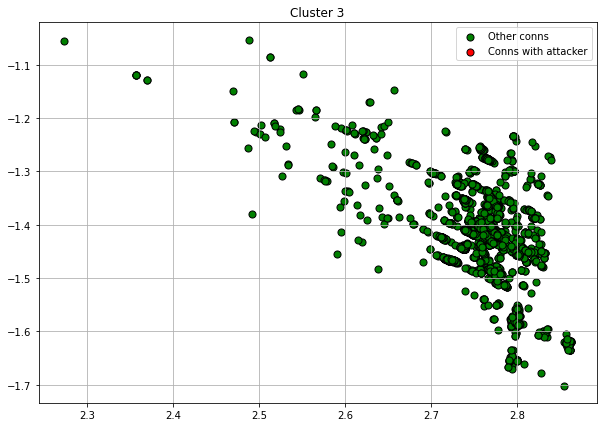

Total num of conns: 3255

Attacker conns ratio:
No    3255
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     815
192.168.10.15    536
192.168.10.12    535
192.168.10.14    327
192.168.10.9     279
192.168.10.51    249
192.168.10.5     243
192.168.10.16    130
192.168.10.17     74
192.168.10.25     67
Name: originated_ip, dtype: int64

87.106.49.27      73
162.213.33.50     56
172.217.10.66     32
23.208.107.53     27
62.161.94.230     27
                  ..
66.235.147.240     1
52.207.124.85      1
152.163.64.1       1
52.84.26.18        1
104.20.209.21      1
Name: responded_ip, Length: 1042, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:00.034364Z
timestamp max = 2017-07-06T14:04:47.086763Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
15650  ClAkQd2IIwczJ4on99            1.00000   192.168.10.8           0.59320   
2139   CcK89E3dohjgpIez93            1.00000  192.168.10.12           0.28563   
5783   C817u81qvV6NtiwFAb            1.00000   192.168.10.8           0.79556   
9066   CIRfF34OmQrqNS0Au2            1.00000  192.168.10.14           0.00000   
12921   CW3u4UXVk4ZpKMTU6            1.00000   192.168.10.8           0.28554   
4924   CKjtp93hVNSLU1lo59            1.00000  192.168.10.14           0.19846   
7166   CvrUsc41bMvaY59V3i            1.00000   192.168.10.8           0.60881   
2480   CLmBYK28vYBJGtG3jh            1.00000  192.168.10.51           0.67274   
16719  CmlB5p4cgnujg1V0B7            1.00000  192.168.10.12           0.84897   
1577   CqtOut16A3FxcUnAkl            1.00000   192.168.10.8           0.58831   
1475   CBCO5S3TUmv8CD4s8d            1.00000   192.168.10.8           0.02461   
13173  CbF3vF3O05NL0GLdqk            1.00000  192.168.10.25           0.08619   
7105   CWEpIo3bzN518e7JBg            1.00000   192.168.10.8           0.12975   
9188   CJIZpy3tW5rP5TFvHh            1.00000   192.168.10.9           0.19841   
3459   CaijwT1gsXFxyKlfOd            1.00000  192.168.10.17           0.67274   

         responded_ip                    timestamp  connection.time  duration  \
15650  152.163.66.165  2017-07-06T13:54:19.195396Z          0.64433 116.73233   
2139    74.125.29.108  2017-07-06T13:57:58.586362Z          0.76628   1.89784   
5783   204.13.192.177  2017-07-06T13:54:25.025319Z          0.64757  10.84802   
9066       1.234.58.2   2017-07-06T13:44:57.13575Z          0.33191 100.72449   
12921   74.119.118.86  2017-07-06T13:57:01.359513Z          0.73447  40.75595   
4924    52.87.124.213  2017-07-06T13:36:28.207341Z          0.04902 117.71411   
7166   156.154.200.36  2017-07-06T13:43:36.710668Z          0.28721   0.22250   
2480    172.217.10.38  2017-07-06T13:54:00.793991Z          0.63410   5.11355   
16719  217.160.86.204  2017-07-06T13:39:30.880188Z          0.15056   5.33676   
1577    151.101.22.49  2017-07-06T13:43:39.196211Z          0.28859 182.23026   
1475       8.43.72.57  2017-07-06T13:51:42.721743Z          0.55735 117.22546   
13173  23.208.107.184  2017-07-06T13:36:30.687144Z          0.05040 195.78539   
7105   34.225.212.225  2017-07-06T13:54:18.430302Z          0.64390  61.00171   
9188     52.84.26.103  2017-07-06T13:58:47.642842Z          0.79355 183.92813   
3459    172.217.11.14  2017-07-06T13:42:48.313603Z          0.26030 115.75600   

       connection.duration protocol service conn_state  connection.orig_p  \
15650              0.09752      tcp     ssl         SF            0.77606   
2139               0.00159      tcp     ssl         SF            0.69346   
5783               0.00906      tcp     ssl         SF            0.77820   
9066               0.08415      tcp     ssl         SF            0.93970   
12921              0.03405      tcp     ssl       RSTR            0.77907   
4924               0.09834      tcp     ssl         SF            0.93477   
7166               0.00019      tcp     ssl         SF            0.76435   
2480               0.00427      tcp     ssl         SF            0.76539   
16719              0.00446      tcp     ssl         SF            0.57943   
1577               0.15224      tcp     ssl         SF            0.76635   
1475               0.09793      tcp     ssl         SF            0.77353   
13173              0.16357      tcp     ssl       RSTR            0.76428   
7105               0.05096      tcp     ssl         SF            0.77555   
9188               0.15366      tcp     ssl         SF            0.04456   
3459               0.09671      tcp     ssl         SF            0.61295   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
15650   50868  orig_reg_or_dyn                0.02281     3254   
2139    45458  orig_reg_or_dyn                0.00949     1354 

Protocol:
tcp    3255
Name: protocol, dtype: int64

Service:
ssl     3226
none      29
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3255
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3239
resp_well_known      16
Name: resp_p_cat, dtype: int64




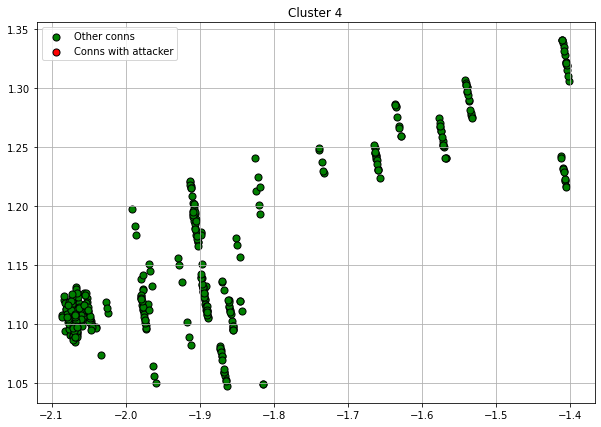

Total num of conns: 370

Attacker conns ratio:
No    370
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    370
Name: originated_ip, dtype: int64

192.168.10.3    370
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:16.106935Z
timestamp max = 2017-07-06T14:03:07.544458Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
13733  C7nxe7438qt9pdUOC8            1.00000  192.168.10.19           0.75070   
7775    CXEq9NSCLQQB76f4h            1.00000  192.168.10.19           0.75070   
13844   CBU1wZreD86wWDI21            1.00000  192.168.10.19           0.75070   
778    CPY5af3bToYXhcckY4            1.00000  192.168.10.19           0.75070   
5016    CRvwpI9Nbr8rtOXu5            1.00000  192.168.10.19           0.75070   
16637   CcUzXkhwMA56zFCX4            1.00000  192.168.10.19           0.75070   
4099   CBSOkm3OH11EEPpsh7            1.00000  192.168.10.19           0.75070   
14384   Cl6d724eD1MWlVhMe            1.00000  192.168.10.19           0.75070   
12108  CvjVyU3Wkp9wyw68X8            1.00000  192.168.10.19           0.75070   
5417    CWmt6sP8s2Pv4W1G4            1.00000  192.168.10.19           0.75070   
8668   ClJjnm1Os3zWqCckn7            1.00000  192.168.10.19           0.75070   
5065   C4lwl22LRdiz8Sb8o2            1.00000  192.168.10.19           0.75070   
6898   CQUYuF3hqFJwqe7Dre            1.00000  192.168.10.19           0.75070   
17786  CviFh63YnfOJ33v759            1.00000  192.168.10.19           0.75070   
1320   CJ113x2WVnFIzTSy0a            1.00000  192.168.10.19           0.75070   

       responded_ip                    timestamp  connection.time  duration  \
13733  192.168.10.3  2017-07-06T13:39:55.685128Z          0.16435   0.03110   
7775   192.168.10.3  2017-07-06T13:35:46.542798Z          0.02586   0.06143   
13844  192.168.10.3  2017-07-06T13:35:16.108673Z          0.00895   0.00021   
778    192.168.10.3  2017-07-06T13:39:56.110486Z          0.16459   0.03833   
5016   192.168.10.3  2017-07-06T13:39:55.685177Z          0.16435   0.03161   
16637  192.168.10.3  2017-07-06T13:46:54.743694Z          0.39728   0.00040   
4099   192.168.10.3  2017-07-06T13:39:55.352382Z          0.16416   0.03135   
14384  192.168.10.3  2017-07-06T13:56:17.914808Z          0.71032   0.00026   
12108  192.168.10.3  2017-07-06T13:39:55.602461Z          0.16430   0.00030   
5417   192.168.10.3  2017-07-06T13:46:54.743678Z          0.39728   0.00032   
8668   192.168.10.3  2017-07-06T13:47:16.080763Z          0.40914   0.00016   
5065   192.168.10.3  2017-07-06T13:53:16.069999Z          0.60924   0.00015   
6898   192.168.10.3  2017-07-06T13:35:16.108723Z          0.00895   0.00016   
17786  192.168.10.3  2017-07-06T13:35:47.618753Z          0.02646   0.00031   
1320   192.168.10.3  2017-07-06T13:39:55.831589Z          0.16443   0.03107   

       connection.duration protocol service conn_state  connection.orig_p  \
13733              0.00003      udp     dns         SF            0.95326   
7775               0.00005      udp     dns         SF            0.61837   
13844              0.00000      udp     dns         SF            0.66243   
778                0.00003      udp     dns         SF            0.30445   
5016               0.00003      udp     dns         SF            0.53794   
16637              0.00000      udp     dns         SF            0.62247   
4099               0.00003      udp     dns         SF            0.82233   
14384              0.00000      udp     dns         SF            0.78460   
12108              0.00000      udp     dns         SF            0.75177   
5417               0.00000      udp     dns         SF            0.96794   
8668               0.00000      udp     dns         SF            0.95338   
5065               0.00000      udp     dns         SF            0.47009   
6898               0.00000      udp     dns         SF            0.44537   
17786              0.00000      udp     dns         SF            0.88777   
1320               0.00003      udp     dns         SF            0.74128   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
13733   62473  orig_reg_or_dyn                0.00059       84   
7775    40540  orig_reg_or_dyn                0.00050       72   
13844   43426  orig_reg_or_dy

Protocol:
udp    370
Name: protocol, dtype: int64

Service:
dns    370
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    370
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    370
Name: resp_p_cat, dtype: int64




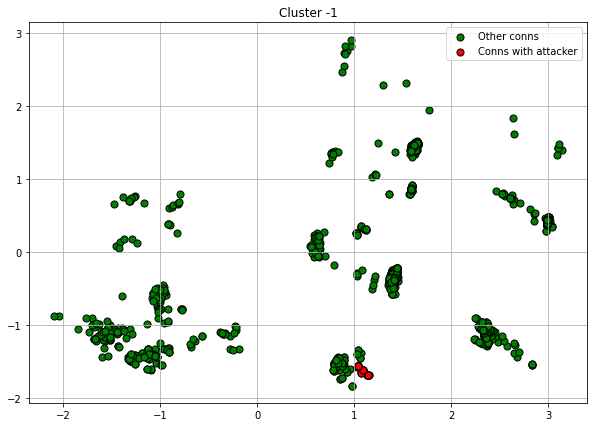

Total num of conns: 1118

Attacker conns ratio:
No     1084
Yes      34
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    285
192.168.10.17    177
192.168.10.25    117
192.168.10.12     99
192.168.10.16     87
192.168.10.5      67
192.168.10.50     60
192.168.10.15     54
192.168.10.9      35
192.168.10.14     35
172.16.0.1        34
192.168.10.8      29
192.168.10.51     20
192.168.10.3      19
Name: originated_ip, dtype: int64

192.168.10.3      178
192.168.10.50     127
192.168.10.255     69
192.168.10.19      50
74.117.200.68      42
                 ... 
52.22.101.150       1
104.88.40.28        1
172.217.10.8        1
172.217.10.142      1
198.8.70.211        1
Name: responded_ip, Length: 181, dtype: int64

Time:
timestamp min = 2017-07-06T13:35:00.012744Z
timestamp max = 2017-07-06T14:04:59.064477Z

Cluster -1 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
2062   CVZeuG1EWjLShr7kk8            0.00000    172.16.0.1           0.75070   
6566   Cxr9HD23eYlTA8DZNe            0.00000    172.16.0.1           0.75070   
6431   CMiLHp3KDslCJMrDp1            0.00000    172.16.0.1           0.75070   
12152  C9NcM51nUbvwHf48u6            0.00000    172.16.0.1           0.75070   
6497   CUTYqa3uXYuNJlsq6d            0.00000    172.16.0.1           0.75070   
11434  CFyggt441hUjfO2CWl            0.00000    172.16.0.1           0.75070   
9778   C5LHTy3PRE3wSZapz5            0.00000    172.16.0.1           0.75070   
8545   Cyx1us2ZjFVuuPcHYi            0.00000    172.16.0.1           0.75070   
847    Cd3lec4WdA53l8EyK6            0.00000    172.16.0.1           0.75070   
4241    Cm332GhPCzSNZCEA9            0.00000    172.16.0.1           0.75070   
5334   CDtip31AM0eFBDiZq8            0.00000    172.16.0.1           0.75070   
958     C9IwcXZafo9tZ26nj            0.00000    172.16.0.1           0.75070   
16206  CemiOB1IeSIBTjnnBi            0.00000    172.16.0.1           0.75070   
10462   CSk1NvFE0SvT8MrUd            0.00000    172.16.0.1           0.75070   
5576   C2cyeL2ur3DUjNaDo2            0.00000    172.16.0.1           0.75070   

        responded_ip                    timestamp  connection.time  duration  \
2062   192.168.10.50  2017-07-06T13:35:04.459614Z          0.00247   5.46995   
6566   192.168.10.50  2017-07-06T13:35:13.457767Z          0.00747   5.47360   
6431   192.168.10.50  2017-07-06T13:35:03.204865Z          0.00177   5.72419   
12152  192.168.10.50  2017-07-06T13:35:00.925355Z          0.00051   0.00021   
6497   192.168.10.50   2017-07-06T13:35:18.58918Z          0.01033   2.75196   
11434  192.168.10.50  2017-07-06T13:35:33.801349Z          0.01878   5.00156   
9778   192.168.10.50  2017-07-06T13:42:50.310628Z          0.26141   5.00955   
8545   192.168.10.50   2017-07-06T13:35:12.14225Z          0.00674   5.78874   
847    192.168.10.50  2017-07-06T13:40:33.464668Z          0.18535   5.08716   
4241   192.168.10.50   2017-07-06T13:35:08.30013Z          0.00461   5.63018   
5334   192.168.10.50  2017-07-06T13:35:00.655714Z          0.00036   5.27289   
958    192.168.10.50  2017-07-06T13:42:12.265347Z          0.24027   5.00555   
16206  192.168.10.50  2017-07-06T13:35:01.926114Z          0.00106   0.00012   
10462  192.168.10.50  2017-07-06T13:40:22.024349Z          0.17899   5.03926   
5576   192.168.10.50  2017-07-06T13:42:45.285885Z          0.25862   5.01739   

       connection.duration protocol service conn_state  connection.orig_p  \
2062               0.00457      tcp    none         SF            0.54911   
6566               0.00457      tcp    none         SF            0.55054   
6431               0.00478      tcp    none         SF            0.54889   
12152              0.00000      tcp    none         SF            0.54767   
6497               0.00230      tcp    none         SF            0.55137   
11434              0.00418      tcp    none         SF            0.55188   
9778               0.00419      tcp    http         SF            0.55277   
8545               0.00484      tcp    none         SF            0.55033   
847                0.00425      tcp    http         SF            0.55213   
4241               0.00470      tcp    none         SF            0.54972   
5334               0.00441      tcp    none         SF            0.54849   
958                0.00418      tcp    http         SF            0.55231   
16206              0.00000      tcp    none         SF            0.54788   
10462              0.00421      tcp    http         SF            0.55210   
5576               0.00419      tcp    http         SF            0.55274   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
2062    36004  orig_reg_or_dyn                0.00000        0   
6566    36098  orig_reg_or_dyn                0.00000        0   
6431    35990  orig_reg_or_dy

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
16391  CzDHpW38uGePPYWeK1            1.00000  192.168.10.17           0.75070   
591     C6K3EUKg5xU5VKCrj            1.00000  192.168.10.17           0.80488   
3545    CfbydE4WjRmPhi0nj            1.00000  192.168.10.25           0.75070   
2703   C7Anc63v5d6GoRQrp4            1.00000   192.168.10.9           0.75070   
8583   CKZcHx33Ij6z3NBnnk            1.00000  192.168.10.19           0.25947   
9977   CjFRud3oGav4IjvV9c            1.00000  192.168.10.19           0.62136   
1222   CvW3sm3DFEutLZse45            1.00000  192.168.10.19           0.50214   
15801   CDCpOFscumckMlexj            1.00000  192.168.10.19           0.25947   
14661   Cg7aqfL4Qld4uxbO3            1.00000  192.168.10.12           0.12936   
10920   CmsD0Ftc56r2VRsue            1.00000  192.168.10.19           0.75070   
6003   Cvg8ol3LZ9UuEWSqNh            1.00000  192.168.10.17           0.80488   
6621    CmVVhfNu7Fm6JhmQ4            1.00000   192.168.10.3           0.75070   
529    CmBSvO3H8R3ycktA17            1.00000  192.168.10.19           0.28552   
6613   CUr8Im1vru67Qiwl6k            1.00000  192.168.10.19           0.01228   
8254    C8go9KM0ZAq7zZld3            1.00000  192.168.10.19           0.83245   

         responded_ip                    timestamp  connection.time  duration  \
16391   192.168.10.19  2017-07-06T13:55:42.120794Z          0.69042   0.00000   
591     206.108.0.131  2017-07-06T13:47:36.035734Z          0.42023   0.02213   
3545    192.168.10.19  2017-07-06T13:50:17.882402Z          0.51020   0.04987   
2703     192.168.10.3  2017-07-06T13:44:02.498492Z          0.30154   0.61523   
8583   67.215.197.149  2017-07-06T13:48:39.271956Z          0.45538   0.02404   
9977     159.203.8.72  2017-07-06T14:02:53.272256Z          0.93008   0.02240   
1222    129.128.12.20  2017-07-06T13:45:26.271846Z          0.34811   0.08744   
15801  67.215.197.149  2017-07-06T13:57:25.272085Z          0.74776   0.02407   
14661  34.200.204.125  2017-07-06T13:35:05.317011Z          0.00295  40.49630   
10920    192.168.10.3  2017-07-06T13:56:01.949631Z          0.70145   1.02352   
6003    206.108.0.132  2017-07-06T14:01:58.035582Z          0.89938   0.02873   
6621   192.168.10.255  2017-07-06T13:56:08.121629Z          0.70488   1.49907   
529     74.117.200.68  2017-07-06T13:39:55.030033Z          0.16398   0.13637   
6613       5.9.74.228  2017-07-06T13:50:00.271981Z          0.50041   0.11617   
8254   213.109.127.82  2017-07-06T13:59:22.272172Z          0.81279   0.10980   

       connection.duration protocol             service conn_state  \
16391              0.00000      udp                 dns         SF   
591                0.00002      udp                 ntp         SF   
3545               0.00004      tcp  gssapi,smb,dce_rpc         SF   
2703               0.00051      tcp                none       RSTR   
8583               0.00002      udp                 ntp         SF   
9977               0.00002      udp                 ntp         SF   
1222               0.00007      udp                 ntp         SF   
15801              0.00002      udp                 ntp         SF   
14661              0.03383      tcp                none         SF   
10920              0.00086      tcp                none         S1   
6003               0.00002      udp                 ntp         SF   
6621               0.00125      udp                 dns         S0   
529                0.00011      tcp                 ssl         SF   
6613               0.00010      udp                 ntp         SF   
8254               0.00009      udp                 ntp         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
16391            0.00145     137  orig_well_known                0.00043   
591              0.00124     123  orig_well_known                0.00034   
3545             0.76530   50163  orig_reg_or_dyn                0.00872   
270

Protocol:
udp    587
tcp    531
Name: protocol, dtype: int64

Service:
ntp                   418
none                  269
ssl                   119
dns                   110
ssh                    63
http                   41
dce_rpc                24
ftp-data               15
ftp                    15
krb                    13
gssapi,smb,krb         11
gssapi,smb,dce_rpc     10
krb_tcp                 8
gssapi,ntlm,smb         2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    600
orig_well_known    518
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123           418
resp_443           257
resp_well_known    232
resp_80             81
resp_22             63
resp_reg            31
resp_dyn            21
resp_21             15
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [40]:
df['uid'] = result['uid']
df['originated_ip_num'] = result['originated_ip_num']
df['originated_ip'] = result['originated_ip']
df['responded_ip_num'] = result['responded_ip_num']
df['responded_ip'] = result['responded_ip']
df['timestamp'] = result['timestamp']
df['duration'] = result['duration']
df['protocol'] = result['protocol']
df['service'] = result['service']
df['conn_state'] = result['conn_state']
df['o_port'] = result['o_port']
df['orig_p_cat'] = result['orig_p_cat']
df['o_bytes'] = result['o_bytes']
#df['o_ip_bytes'] = result['o_ip_bytes']
df['r_port'] = result['r_port']
df['resp_p_cat'] = result['resp_p_cat']
df['r_bytes'] = result['r_bytes']
#df['r_ip_bytes'] = result['r_ip_bytes']
df['attacker_label'] = result['attacker_label']
df['victim_label'] = result['victim_label']
df['cluster'] = y_db
df

connection.time  connection.duration  connection.orig_p  \
0              0.63309              0.00003            0.92297   
1              0.15015              0.00003            0.93987   
2              0.55791              0.00012            0.22687   
3              0.47663              0.00018            0.82722   
4              0.11988              0.09679            0.04265   
...                ...                  ...                ...   
17903          0.15159              0.15104            0.78904   
17904          0.44496              0.01250            0.82322   
17905          0.02878              0.09723            0.92933   
17906          0.55475              0.00003            0.81355   
17907          0.20112              0.00003            0.62537   

       connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                    0.00048               0.00030            0.00050   
1                    0.00040               0.00030            0.00050   
2                    0.00036               0.00060            0.00050   
3                    0.00306               0.00151            0.00093   
4                    0.00957               0.00663            0.00664   
...                      ...                   ...                ...   
17903                0.00498               0.00633            0.00664   
17904                0.00230               0.00422            0.00179   
17905                0.01020               0.00633            0.00093   
17906                0.00050               0.00060            0.00050   
17907                0.00057               0.00060            0.00050   

       connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                    0.00002               0.00027    1.00000    0.00000   
1                    0.00002               0.00027    1.00000    0.00000   
2                    0.00002               0.00055    1.00000    0.00000   
3                    0.00010               0.00137    0.00000    0.00000   
4                    0.00046               0.00601    0.00000    0.00000   
...                      ...                   ...        ...        ...   
17903                0.00048               0.00437    0.00000    0.00000   
17904                0.00003               0.00273    0.00000    0.00000   
17905                0.00093               0.00601    0.00000    0.00000   
17906                0.00003               0.00055    1.00000    0.00000   
17907                0.00002               0.00055    1.00000    0.00000   

       http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0         0.00000    0.00000      0.00000                           1   
1         0.00000    0.00000      0.00000                           1   
2         0.00000    0.00000      0.00000                           1   
3         1.00000    0.00000      0.05556                           1   
4         0.00000    1.00000      0.00000                           1   
...           ...        ...          ...                         ...   
17903     0.00000    1.00000      0.00000                           1   
17904     0.00000    0.00000      0.00000                           1   
17905     1.00000    0.00000      0.08333                           1   
17906     0.00000    0.00000      0.00000                           1   
17907     0.00000    0.00000      0.00000                           1   

       orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                               0                    0                   0   
1                               0                    0                   0   
2                               0                    0                   0   
3                               0                    0                   0   
4                               0                    0                   0   
...                           ...                  ...                 ...   
1

In [41]:
from datetime import date

print(PREFIX_PATH + 'dbscan_backup' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'dbscan_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)
df.to_csv(PREFIX_PATH + 'dbscan_df_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/dbscan_backup09_12.csv


## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [42]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 5
Estimated number of noise points: 1118
Silhouette Coefficient: 0.599


## Interpretation

Parallel coordinates plots.

In [43]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

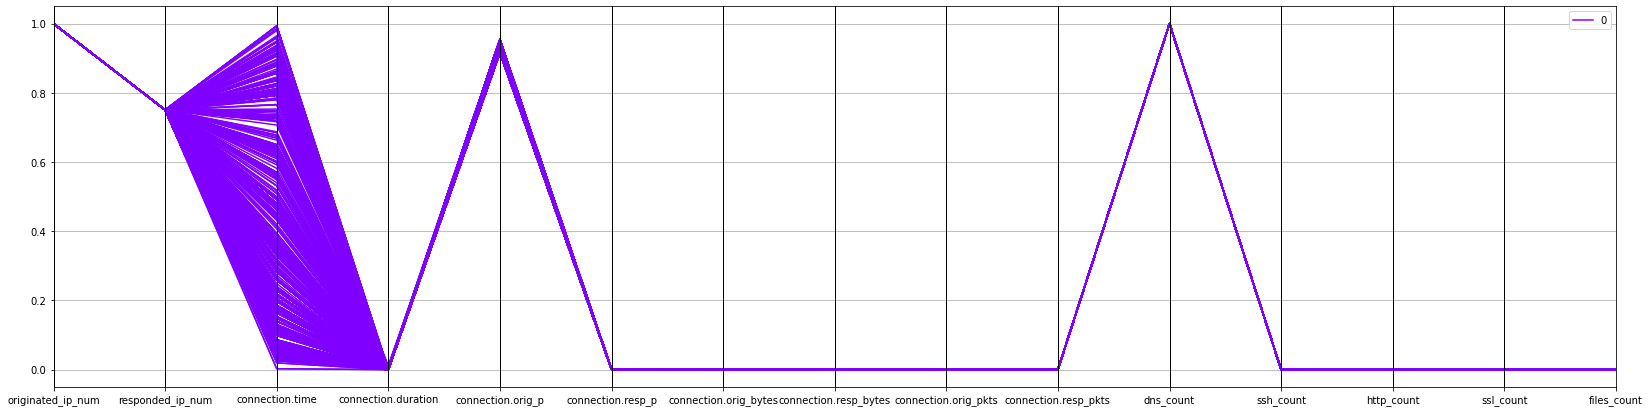

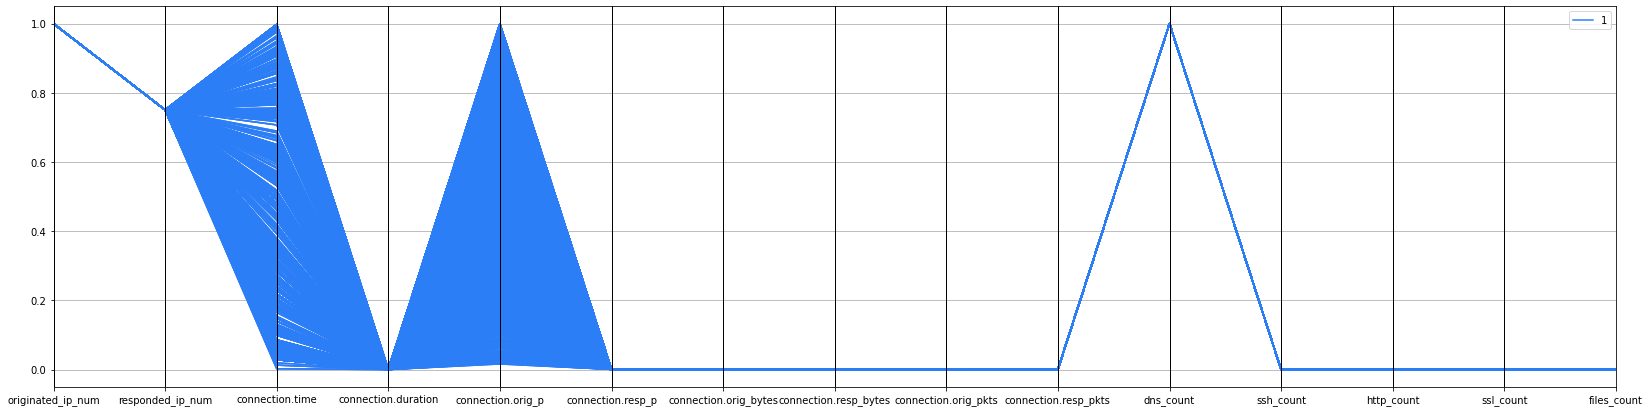

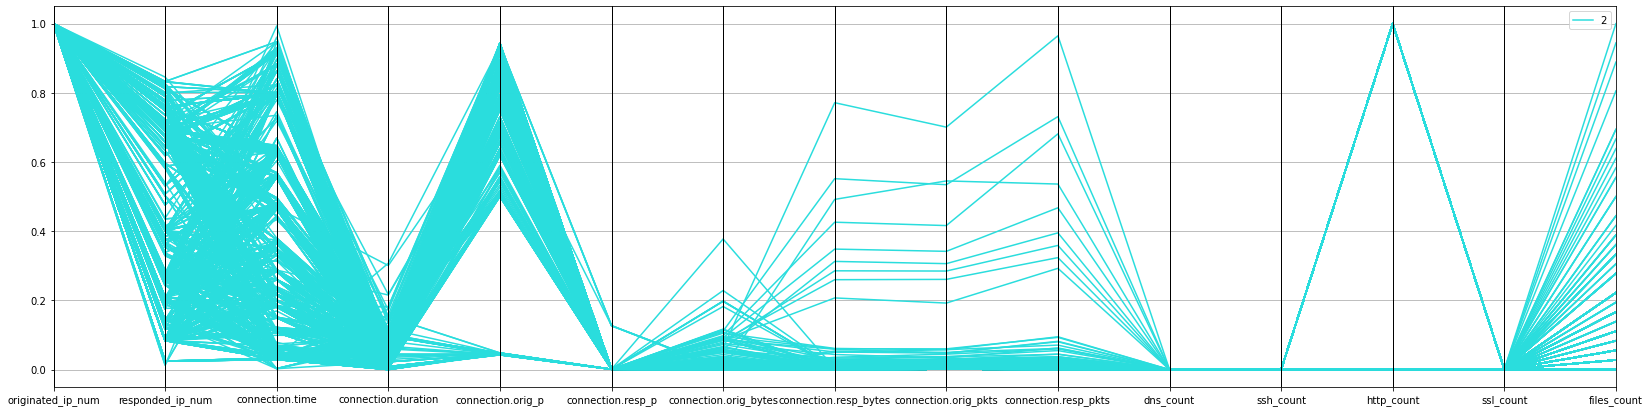

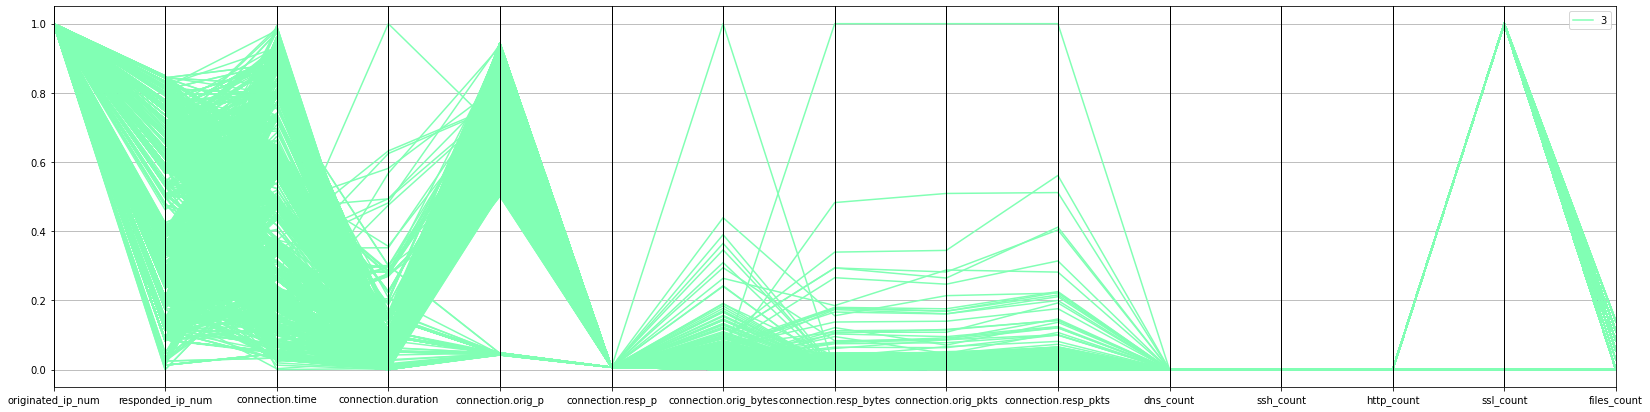

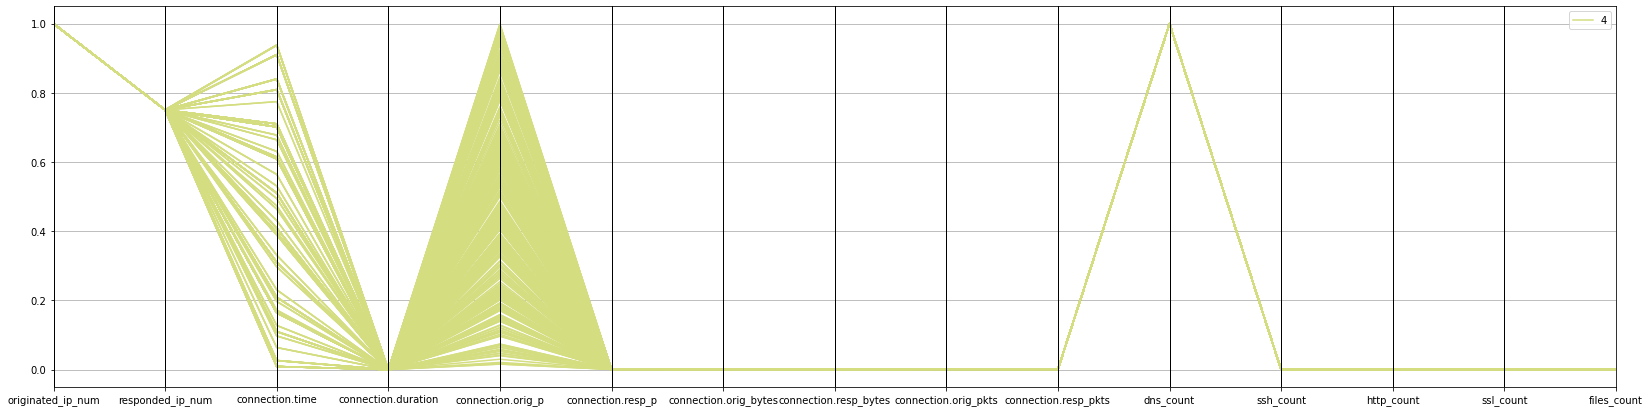

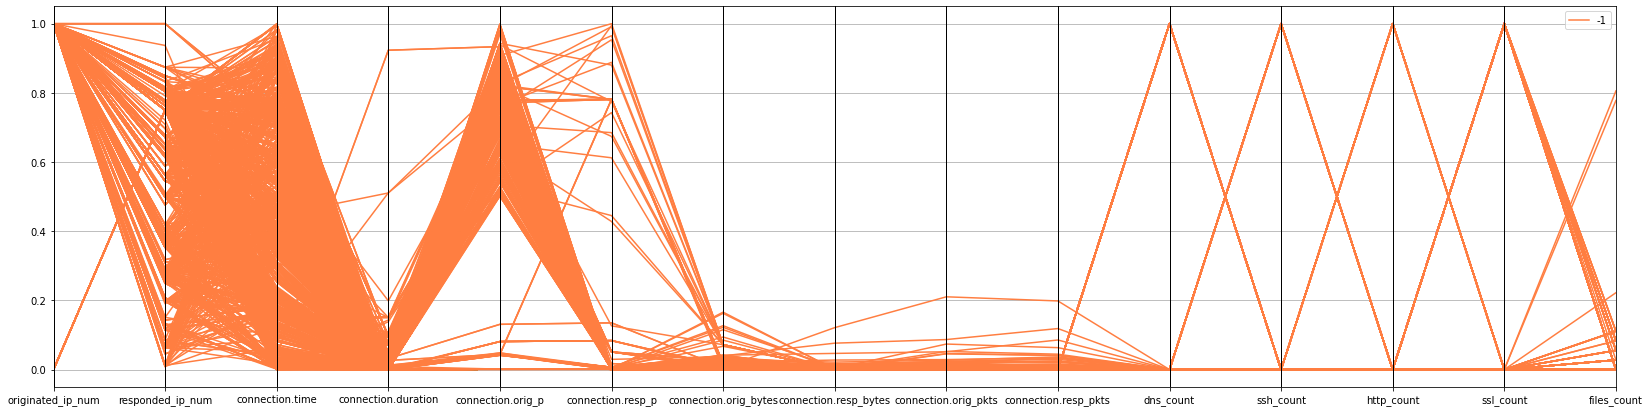

In [44]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

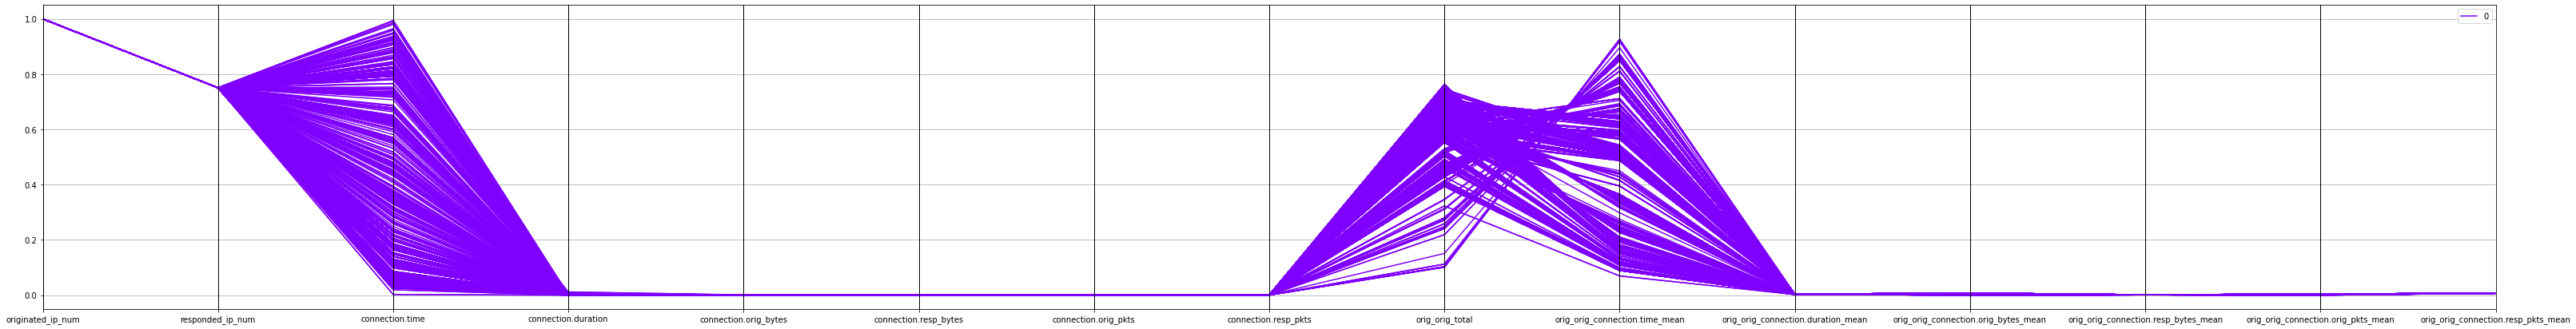

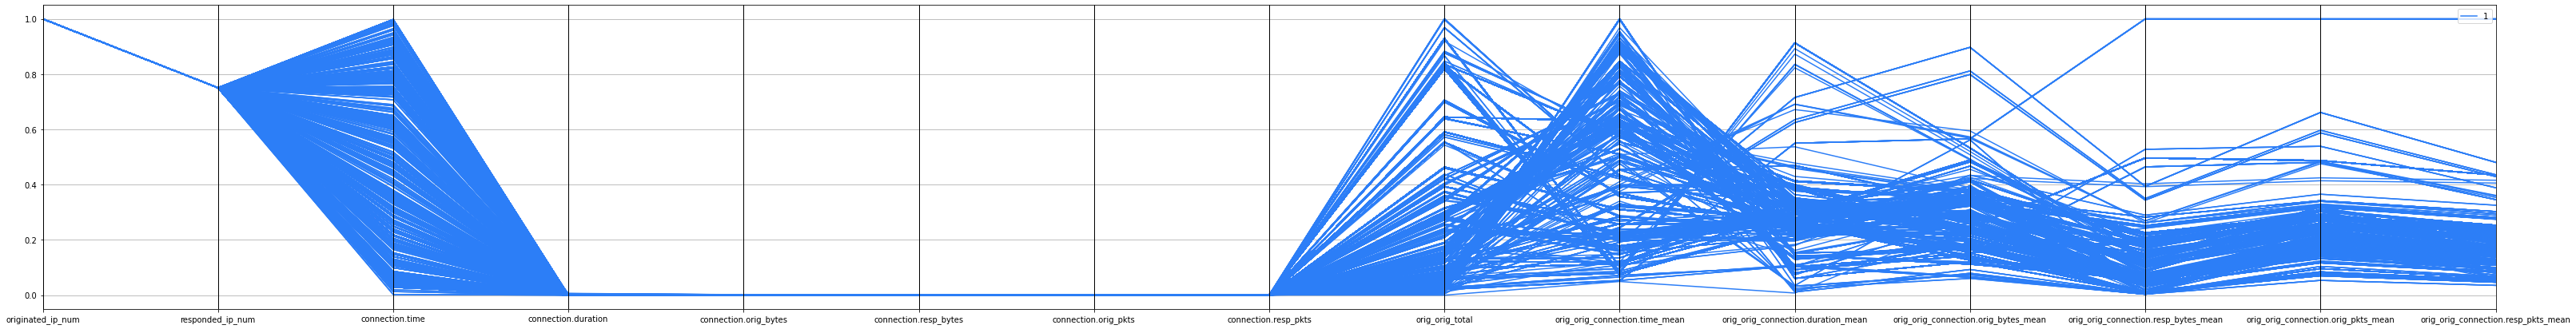

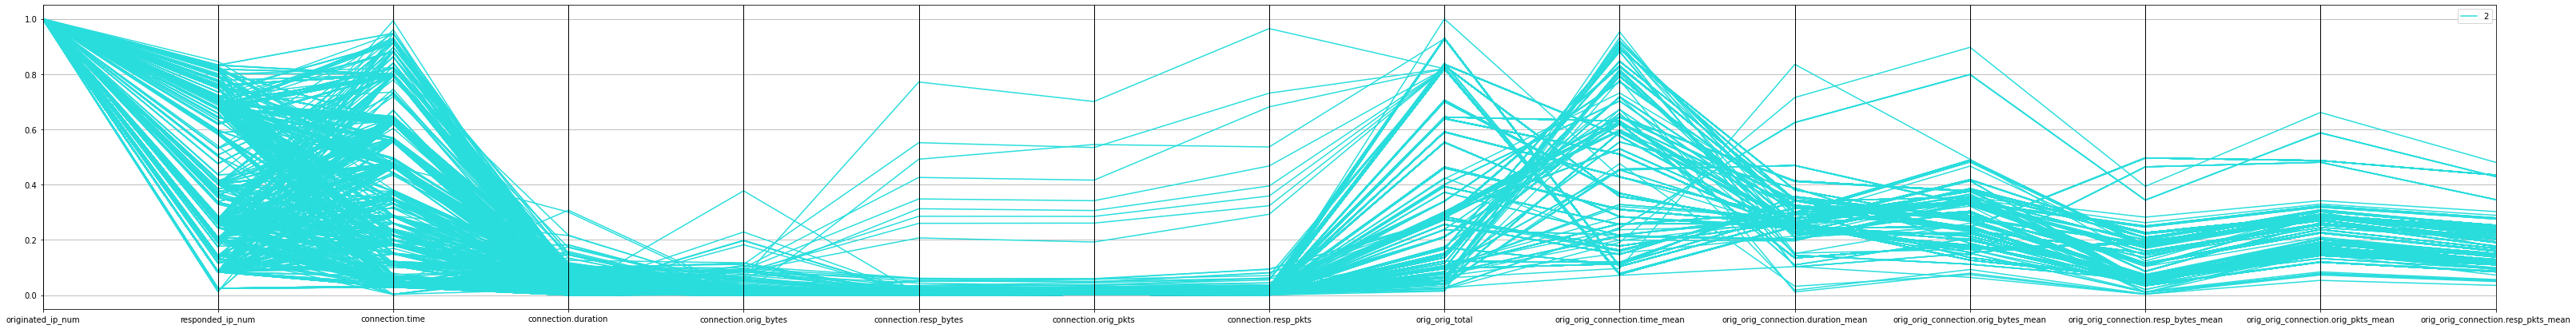

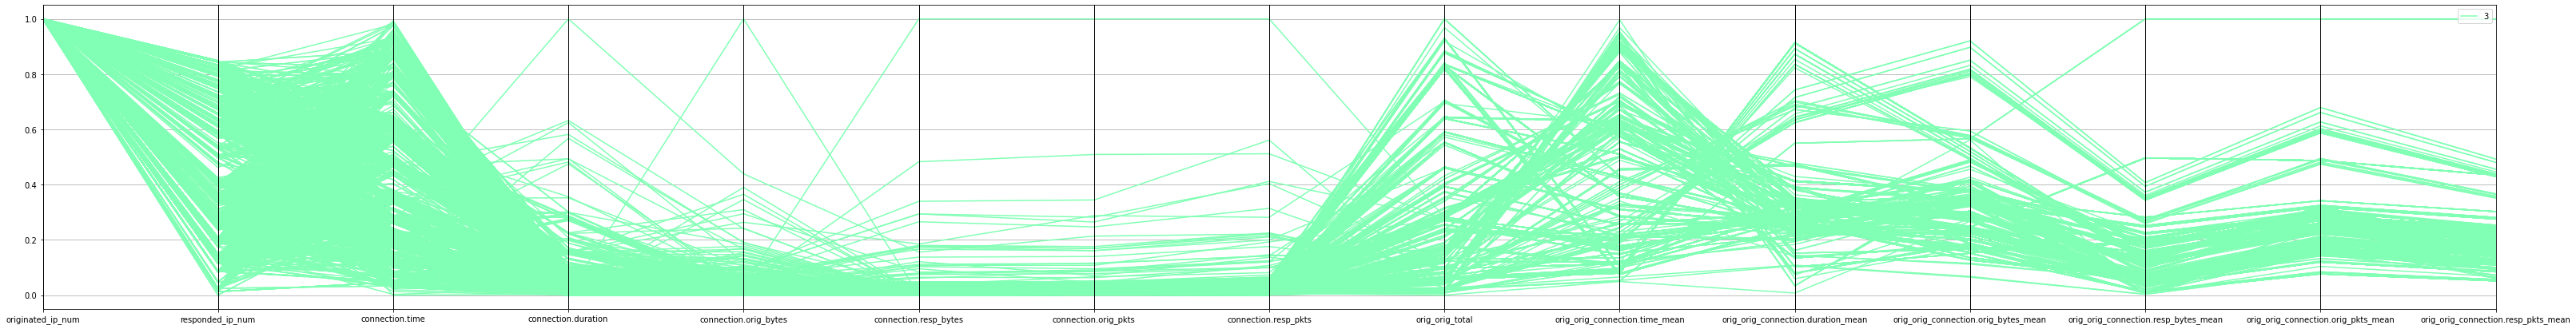

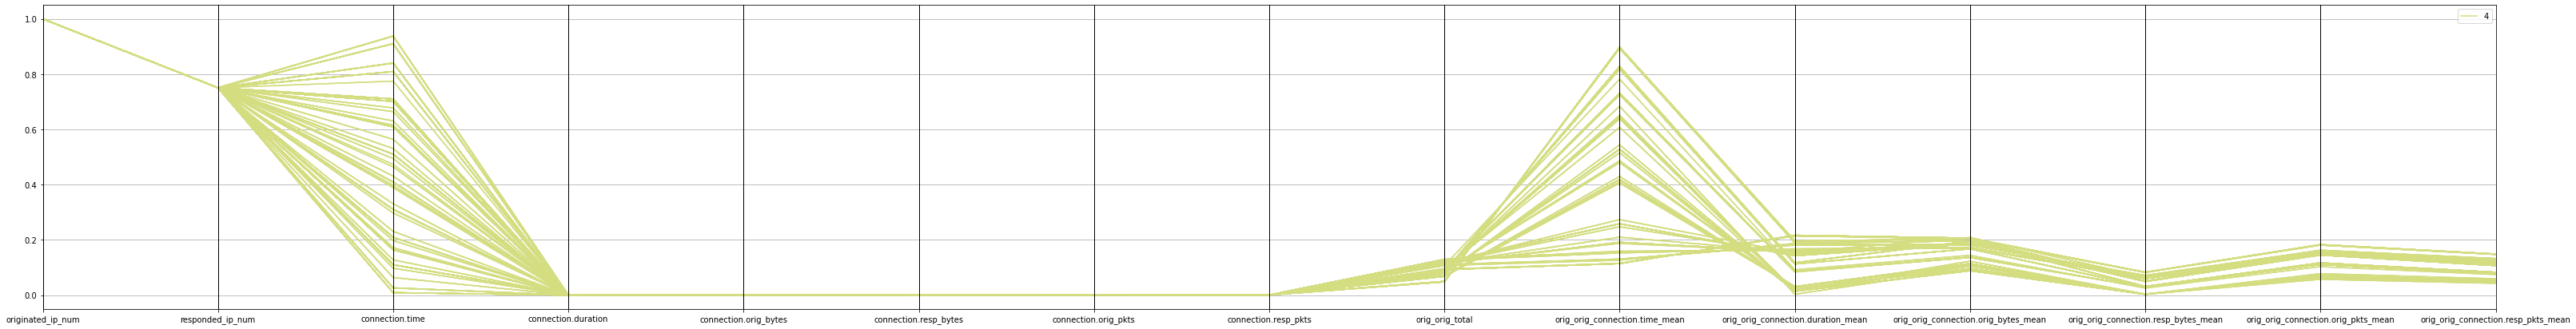

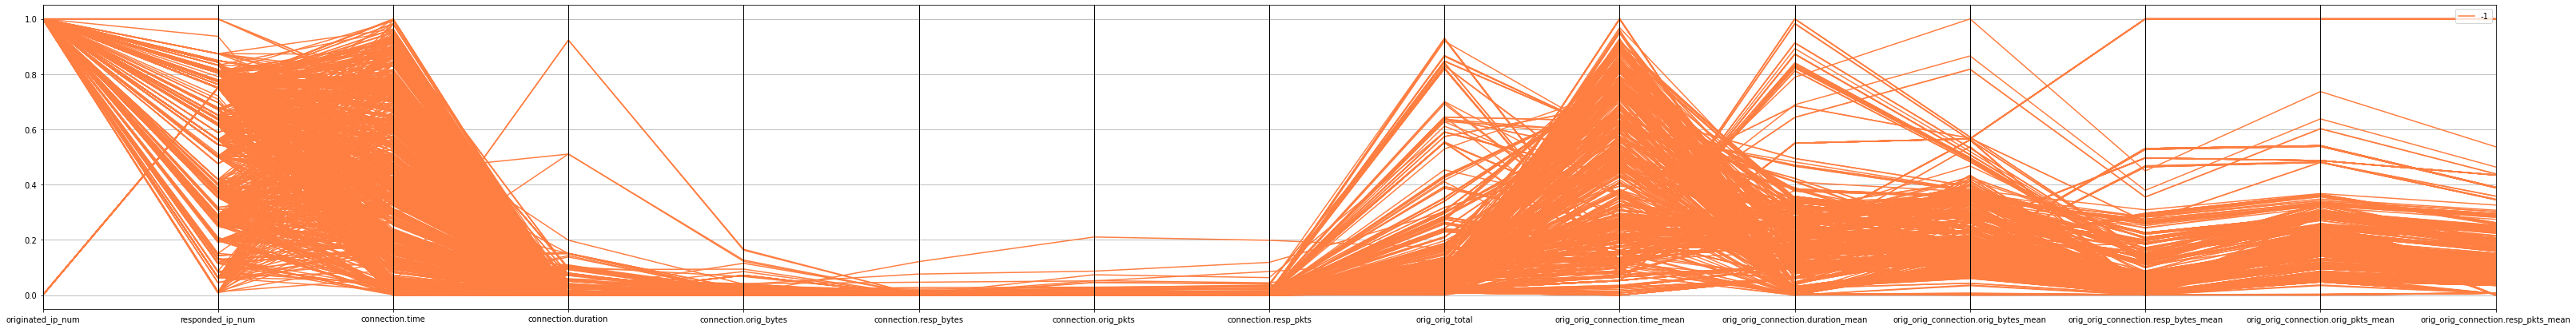

In [45]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()